# 로지스틱 손실함수(이진 크로스엔트로피 손실 함수)

In [2]:
import pandas as pd
df = pd.read_csv('http://bit.ly/fish_csv_data')
df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [9]:
# 정답과 분류
X = df.iloc[:, 1:].to_numpy()
Y = df.iloc[:, 0].to_numpy()
print(type(X), type(Y))

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

# 훈련 / 테스트(검증) 세트로 분리
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

# 선형모델중에 적합한 모델 선택
# SGDClassifier: 확률적 경사하강법을 적용한 머신러닝
# 확률적 경사하강법: 학습용 데이터가 매번 갱신되는 상황에서 전체데이터를 다 사용하지 않고 확보된 데이터만 가지고 학습이 가능
from sklearn.linear_model import SGDClassifier
# 손실함수로 log를 사용한다는 것은 각 클래스를 기준으로 이진분류를 각각 만들어서 합치는 것
sc = SGDClassifier(loss="log", max_iter=10, random_state=0)

# 훈련
sc.fit(x_train, y_train)

# 학습용 / 검증용으로 성능을 출력 -> 과적합
print(sc.score(x_train, y_train))
print(sc.score(x_test, y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
0.7747747747747747
0.6458333333333334


C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [10]:
sc.partial_fit(x_train, y_train)
sc.score(x_train, y_train), sc.score(x_test, y_test)

(0.8378378378378378, 0.7708333333333334)

In [11]:
# 시각화를 통해 최적의 점진적 학습횟수... 성능을 과적합
# 학습을 많이하고 모델이 복잡할수록 과적합 피할 수 없다
sc = SGDClassifier(loss='log', max_iter=100, random_state=0)
sc.fit(x_train, y_train)
train_score, test_score = [], []
for _ in range(300):
    sc.partial_fit(x_train, y_train)
    train_score.append(sc.score(x_train, y_train))
    test_score.append(sc.score(x_test, y_test))

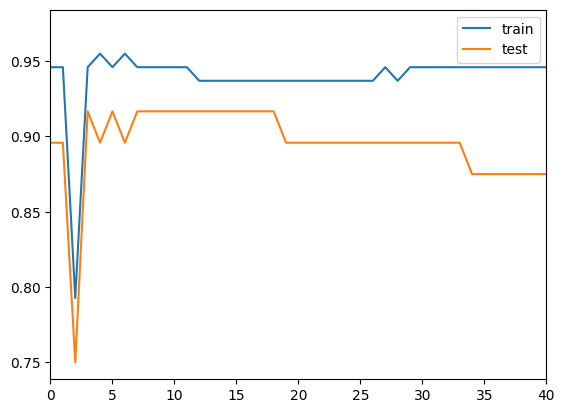

In [14]:
import matplotlib.pyplot as plt
plt.plot(train_score, label='train')
plt.plot(test_score, label='test')
plt.xlim((0,40))
plt.legend()

In [15]:
sc = SGDClassifier(loss='log', max_iter=100, random_state=0)
sc.fit(x_train, y_train)
sc.score(x_train, y_train), sc.score(x_test, y_test)

(0.8918918918918919, 0.8333333333333334)

#### 더 이상 성능향상이 없으면 자동으로 학습을 중지 - 조기종료

# 회귀
    KNeighborsRegressor: 거리중심의 이웃한 데이터를 기준
    LinearRegression: 직선의 방정식   y = ax + b
# 분류
    KNeighborsClassifier 
    SGDClassifier: 확률적 경사하강법 (랜덤하게 경사가 급한방향으로 내려간다)
    LogisticRegression: 값을 예측하나 그 값을 확률로 사용, 로지스틱 함수(sigmoid 함수) 연속적인 값으로 0~1 사이를 표현해서 임계치인 0.5보다 크면 양성클래스, 작으면 음성클래스, 그래서 이진분류